<a href="https://colab.research.google.com/github/commandermaks/Python/blob/Soft-computing/A_2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features.


___

# Series
The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Let's explore this concept through some examples:

In [ ]:
import numpy as np
import pandas as pd

## Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [ ]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

### Using Lists

In [ ]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [ ]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [ ]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

### Using NumPy Arrays

In [ ]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [ ]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

### Using Dictionaries

In [ ]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Data in a Series

A pandas Series can hold a variety of object types:

In [ ]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [ ]:

pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [ ]:
sales_Q1 = pd.Series(data=[250,450,200,150],index = ['USA', 'China','India', 'Brazil'])

In [ ]:
sales_Q1

USA       250
China     450
India     200
Brazil    150
dtype: int64

In [ ]:
sales_Q2 = pd.Series([260,500,210,100],index = ['USA', 'China','India', 'Japan'])

In [ ]:
sales_Q2

USA      260
China    500
India    210
Japan    100
dtype: int64

In [ ]:
sales_Q1['USA']

250

In [ ]:
# KEY ERROR!
# sales_Q1['Russia'] # wrong name!
# sales_Q1['USA '] # wrong string spacing!

Operations are then also done based off of index:

In [ ]:
# We'll explore how to deal with this later on!
sales_Q1 + sales_Q2

Brazil      NaN
China     950.0
India     410.0
Japan       NaN
USA       510.0
dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import randint

In [ ]:
columns= ['W', 'X', 'Y', 'Z'] # four columns
index= ['A', 'B', 'C', 'D', 'E'] # five rows

In [ ]:
np.random.seed(42)
data = randint(-100,100,(5,4))

In [ ]:
data

array([[  2,  79,  -8, -86],
       [  6, -29,  88, -80],
       [  2,  21, -26, -13],
       [ 16,  -1,   3,  51],
       [ 30,  49, -48, -99]])

In [ ]:
df = pd.DataFrame(data,index,columns)

In [ ]:
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


# Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

# COLUMNS

## Grab a single column

In [ ]:
df['W']

A     2
B     6
C     2
D    16
E    30
Name: W, dtype: int32

## Grab multiple columns

In [ ]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2,-86
B,6,-80
C,2,-13
D,16,51
E,30,-99


### DataFrame Columns are just Series

In [ ]:
type(df['W'])

pandas.core.series.Series

### Creating a new column:

In [ ]:
df['new'] = df['W'] + df['Y']

In [ ]:
df

,W,X,Y,Z,new
A,2,79,-8,-86,-6
B,6,-29,88,-80,94
C,2,21,-26,-13,-24
D,16,-1,3,51,19
E,30,49,-48,-99,-18


## Removing Columns

In [ ]:
# axis=1 because its a column
df.drop('new',axis=1)

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


In [ ]:
# Not inplace unless reassigned!
df

,W,X,Y,Z,new
A,2,79,-8,-86,-6
B,6,-29,88,-80,94
C,2,21,-26,-13,-24
D,16,-1,3,51,19
E,30,49,-48,-99,-18


In [ ]:
df = df.drop('new',axis=1)

In [ ]:
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


## Working with Rows

## Selecting one row by name

In [ ]:
df.loc['A']

W     2
X    79
Y    -8
Z   -86
Name: A, dtype: int32

## Selecting multiple rows by name

In [ ]:
df.loc[['A','C']]

,W,X,Y,Z
A,2,79,-8,-86
C,2,21,-26,-13


## Select single row by integer index location

In [ ]:
df.iloc[0]

W     2
X    79
Y    -8
Z   -86
Name: A, dtype: int32

## Select multiple rows by integer index location

In [ ]:
df.iloc[0:2]

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80


## Remove row by name

In [ ]:
df.drop('C',axis=0)

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
D,16,-1,3,51
E,30,49,-48,-99


In [ ]:
# NOT IN PLACE!
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


### Selecting subset of rows and columns at same time

In [ ]:
df.loc[['A','C'],['W','Y']]

,W,Y
A,2,-8
C,2,-26


# Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [ ]:
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


In [ ]:
df>0

,W,X,Y,Z
A,True,True,False,False
B,True,False,True,False
C,True,True,False,False
D,True,False,True,True
E,True,True,False,False


In [ ]:
df[df>0]

,W,X,Y,Z
A,2,79.0,NaN,NaN
B,6,NaN,88.0,NaN
C,2,21.0,NaN,NaN
D,16,NaN,3.0,51.0
E,30,49.0,NaN,NaN


In [ ]:
df['X']>0

A     True
B    False
C     True
D    False
E     True
Name: X, dtype: bool

In [ ]:
df[df['X']>0]

,W,X,Y,Z
A,2,79,-8,-86
C,2,21,-26,-13
E,30,49,-48,-99


In [ ]:
df[df['X']>0]['Y']

A    -8
C   -26
E   -48
Name: Y, dtype: int32

In [ ]:
df[df['X']>0][['Y','Z']]

,Y,Z
A,-8,-86
C,-26,-13
E,-48,-99


For two conditions you can use | and & with parenthesis:

In [ ]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
B,6,-29,88,-80
D,16,-1,3,51


## More Index Details


In [ ]:
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


In [ ]:
# Reset to default 0,1...n index
df.reset_index()

,index,W,X,Y,Z
0,A,2,79,-8,-86
1,B,6,-29,88,-80
2,C,2,21,-26,-13
3,D,16,-1,3,51
4,E,30,49,-48,-99


In [ ]:
df

,W,X,Y,Z
A,2,79,-8,-86
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


In [ ]:
newind = 'CA NY WY OR CO'.split()

In [ ]:
newind

['CA', 'NY', 'WY', 'OR', 'CO']

In [ ]:
df['States'] = newind

In [ ]:
df

,W,X,Y,Z,States
A,2,79,-8,-86,CA
B,6,-29,88,-80,NY
C,2,21,-26,-13,WY
D,16,-1,3,51,OR
E,30,49,-48,-99,CO


In [ ]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,2,79,-8,-86
NY,6,-29,88,-80
WY,2,21,-26,-13
OR,16,-1,3,51
CO,30,49,-48,-99


In [ ]:
df

,W,X,Y,Z,States
A,2,79,-8,-86,CA
B,6,-29,88,-80,NY
C,2,21,-26,-13,WY
D,16,-1,3,51,OR
E,30,49,-48,-99,CO


In [ ]:
df = df.set_index('States')

In [ ]:
df

,W,X,Y,Z
States,,,,
CA,2,79,-8,-86
NY,6,-29,88,-80
WY,2,21,-26,-13
OR,16,-1,3,51
CO,30,49,-48,-99


## DataFrame Summaries
There are a couple of ways to obtain summary data on DataFrames.<br>
<tt><strong>df.describe()</strong></tt> provides summary statistics on all numerical columns.<br>
<tt><strong>df.info and df.dtypes</strong></tt> displays the data type of all columns.

In [ ]:
df.describe()

,W,X,Y,Z
count,5.00000,5.000000,5.000000,5.000000
mean,11.20000,23.800000,1.800000,-45.400000
std,11.96662,42.109381,51.915316,63.366395
min,2.00000,-29.000000,-48.000000,-99.000000
25%,2.00000,-1.000000,-26.000000,-86.000000
50%,6.00000,21.000000,-8.000000,-80.000000
75%,16.00000,49.000000,3.000000,-13.000000
max,30.00000,79.000000,88.000000,51.000000


In [ ]:
df.dtypes

W    int32
X    int32
Y    int32
Z    int32
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, CA to CO
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       5 non-null      int32
 1   X       5 non-null      int32
 2   Y       5 non-null      int32
 3   Z       5 non-null      int32
dtypes: int32(4)
memory usage: 120.0+ bytes


# Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({'A':[1,2,np.nan,4],
                  'B':[5,np.nan,np.nan,8],
                  'C':[10,20,30,40]})

### Keeping missing data

In [ ]:
df

,A,B,C
0,1.0,5.0,10
1,2.0,NaN,20
2,NaN,NaN,30
3,4.0,8.0,40


## Removing missing data

In [ ]:
df.dropna()

,A,B,C
0,1.0,5.0,10
3,4.0,8.0,40


In [ ]:
df.dropna(axis=1)

,C
0,10
1,20
2,30
3,40


### Threshold (Require that many non-NA values.)

In [ ]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,10
1,2.0,NaN,20
3,4.0,8.0,40


## Filling in missing data

In [ ]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,10
1,2,FILL VALUE,20
2,FILL VALUE,FILL VALUE,30
3,4,8,40


In [ ]:
df

,A,B,C
0,1.0,5.0,10
1,2.0,NaN,20
2,NaN,NaN,30
3,4.0,8.0,40


In [ ]:
df['A'].fillna(value=0)

0    1.0
1    2.0
2    0.0
3    4.0
Name: A, dtype: float64

In [ ]:
df['A'].fillna(df['A'].mean())

0    1.000000
1    2.000000
2    2.333333
3    4.000000
Name: A, dtype: float64

In [ ]:
df.fillna(df.mean())

,A,B,C
0,1.000000,5.0,10
1,2.000000,6.5,20
2,2.333333,6.5,30
3,4.000000,8.0,40


# Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [ ]:
import pandas as pd

In [ ]:
# We will cover reading in data in a lot more detail in a later lecture!
df = pd.read_csv('Universities.csv')

In [ ]:
# Show first N rows (N=5 by default)
df.head()

,Sector,University,Year,Completions,Geography
0,"Private for-profit, 2-year",Pima Medical Institute-Las Vegas,2016,591,Nevada
1,"Private for-profit, less-than 2-year",Healthcare Preparatory Institute,2016,28,Nevada
2,"Private for-profit, less-than 2-year",Milan Institute-Las Vegas,2016,408,Nevada
3,"Private for-profit, less-than 2-year",Utah College of Massage Therapy-Vegas,2016,240,Nevada
4,"Public, 4-year or above",Western Nevada College,2016,960,Nevada


Now you can use the .groupby() method to group rows together based off of a **categorical** column. This column will then be reassigned to be the index.

Notice we have 2 steps:

1. Choose a categorical column to group by
2. Choose your aggregation function. Recall an aggregation function should take multiple values and return a single value (e.g. max,min, mean, std, etc...)

In [ ]:

df.groupby('Year')

In [ ]:
df.groupby('Year').mean()

,Completions
Year,
2012,535.078947
2013,526.150000
2014,588.809524
2015,597.250000
2016,609.860465


In [ ]:
type(df.groupby('Year').mean())

pandas.core.frame.DataFrame

In [ ]:
df.groupby('Year').mean().sort_index(ascending=False)

,Completions
Year,
2016,609.860465
2015,597.250000
2014,588.809524
2013,526.150000
2012,535.078947


-----
## Other Aggregate Functions

<table><td><tt
><span
>count</span></tt></td><td>Number of non-null observations</td></tr><tr
><td><tt
><span
>sum</span></tt></td><td>Sum of values</td></tr><tr
><td><tt
><span
>mean</span></tt></td><td>Mean of values</td></tr><tr
><td><tt
><span
>mad</span></tt></td><td>Mean absolute deviation</td></tr><tr
><td><tt
><span
>median</span></tt></td><td>Arithmetic median of values</td></tr><tr
><td><tt
><span
>min</span></tt></td><td>Minimum</td></tr><tr
><td><tt
><span
>max</span></tt></td><td>Maximum</td></tr><tr
><td><tt
><span
>mode</span></tt></td><td>Mode</td></tr><tr
><td><tt
><span
>abs</span></tt></td><td>Absolute Value</td></tr><tr
><td><tt
><span
>prod</span></tt></td><td>Product of values</td></tr><tr
><td><tt
><span
>std</span></tt></td><td>Unbiased standard deviation</td></tr><tr
><td><tt
><span
>var</span></tt></td><td>Unbiased variance</td></tr><tr
><td><tt
><span
>sem</span></tt></td><td>Unbiased standard error of the mean</td></tr><tr
><td><tt
><span
>skew</span></tt></td><td>Unbiased skewness (3rd moment)</td></tr><tr
><td><tt
><span
>kurt</span></tt></td><td>Unbiased kurtosis (4th moment)</td></tr><tr
><td><tt
><span
>quantile</span></tt></td><td>Sample quantile (value at %)</td></tr><tr
><td><tt
><span
>cumsum</span></tt></td><td>Cumulative sum</td></tr><tr
><td><tt
><span
>cumprod</span></tt></td><td>Cumulative product</td></tr><tr
><td><tt
><span
>cummax</span></tt></td><td>Cumulative maximum</td></tr><tr
><td><tt
><span
>cummin</span></tt></td><td>Cumulative minimum</td></tr></tbody></table>

----

## Grouping By multiple columns

In [ ]:
df.head()

,Sector,University,Year,Completions,Geography
0,"Private for-profit, 2-year",Pima Medical Institute-Las Vegas,2016,591,Nevada
1,"Private for-profit, less-than 2-year",Healthcare Preparatory Institute,2016,28,Nevada
2,"Private for-profit, less-than 2-year",Milan Institute-Las Vegas,2016,408,Nevada
3,"Private for-profit, less-than 2-year",Utah College of Massage Therapy-Vegas,2016,240,Nevada
4,"Public, 4-year or above",Western Nevada College,2016,960,Nevada


In [ ]:
df.groupby(['Year','Sector']).mean()

Completions
Year Sector                                              
2012 Private for-profit, 2-year                204.800000
     Private for-profit, 4-year or above       158.000000
     Private for-profit, less-than 2-year      189.571429
     Private not-for-profit, 2-year            332.500000
     Private not-for-profit, 4-year or above   353.000000
     Public, 2-year                           1170.000000
     Public, 4-year or above                  2068.000000
2013 Private for-profit, 2-year                190.812500
     Private for-profit, 4-year or above       155.000000
     Private for-profit, less-than 2-year      183.000000
     Private not-for-profit, 2-year            235.500000
     Private not-for-profit, 4-year or above   338.666667
     Public, 2-year                           1633.000000
     Public, 4-year or above                  2136.166667
2014 Private for-profit, 2-year                184.812500
     Private for-profit, 4-year or above       251.000000
     Private for-profit, less-than 2-year      166.000000
     Private not-for-profit, 2-year            224.500000
     Private not-for-profit, 4-year or above   347.333333
     Public, 2-year                           2286.000000
     Public, 4-year or above                  2527.000000
2015 Private for-profit, 2-year                205.000000
     Private for-profit, 4-year or above       163.250000
     Private for-profit, less-than 2-year      203.625000
     Private not-for-profit, 2-year            212.500000
     Private not-for-profit, 4-year or above   409.333333
     Public, 2-year                           2355.000000
     Public, 4-year or above                  2676.000000
2016 Private for-profit, 2-year                205.375000
     Private for-profit, 4-year or above       124.666667
     Private for-profit, less-than 2-year      194.000000
     Private not-for-profit, 2-year            161.000000
     Private not-for-profit, 4-year or above   302.000000
     Public, 2-year                           2431.000000
     Public, 4-year or above                  2779.500000

In [ ]:
df.groupby('Year').describe()

Completions                                                              
           count        mean          std   min     25%    50%     75%     max
Year                                                                          
2012        38.0  535.078947  1036.433239  13.0  114.25  229.5  420.50  5388.0
2013        40.0  526.150000  1040.474782   0.0   98.50  189.0  413.00  5278.0
2014        42.0  588.809524  1150.355857   0.0  104.50  203.5  371.75  5093.0
2015        44.0  597.250000  1183.371791   0.0   87.75  191.0  405.75  5335.0
2016        43.0  609.860465  1235.952796   0.0   90.00  208.0  414.00  5367.0

In [ ]:
df.groupby('Year').describe().transpose()

Year                      2012         2013         2014         2015  \
Completions count    38.000000    40.000000    42.000000    44.000000   
            mean    535.078947   526.150000   588.809524   597.250000   
            std    1036.433239  1040.474782  1150.355857  1183.371791   
            min      13.000000     0.000000     0.000000     0.000000   
            25%     114.250000    98.500000   104.500000    87.750000   
            50%     229.500000   189.000000   203.500000   191.000000   
            75%     420.500000   413.000000   371.750000   405.750000   
            max    5388.000000  5278.000000  5093.000000  5335.000000   

Year                      2016  
Completions count    43.000000  
            mean    609.860465  
            std    1235.952796  
            min       0.000000  
            25%      90.000000  
            50%     208.000000  
            75%     414.000000  
            max    5367.000000

# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this lecture:

In [ ]:
import pandas as pd
df_one = pd.DataFrame({'k1':['A','A','B','B','C','C'],
                      'col1':[100,200,300,300,400,500],
                      'col2':['NY','CA','WA','WA','AK','NV']})


In [ ]:
df_one

,k1,col1,col2
0,A,100,NY
1,A,200,CA
2,B,300,WA
3,B,300,WA
4,C,400,AK
5,C,500,NV


### Information on Unique Values

In [ ]:
df_one['col2'].unique()

array(['NY', 'CA', 'WA', 'AK', 'NV'], dtype=object)

In [ ]:
df_one['col2'].nunique()

5

In [ ]:
df_one['col2'].value_counts()

WA    2
NV    1
CA    1
NY    1
AK    1
Name: col2, dtype: int64

In [ ]:
df_one

,k1,col1,col2
0,A,100,NY
1,A,200,CA
2,B,300,WA
3,B,300,WA
4,C,400,AK
5,C,500,NV


In [ ]:
df_one.drop_duplicates()

,k1,col1,col2
0,A,100,NY
1,A,200,CA
2,B,300,WA
4,C,400,AK
5,C,500,NV


### Creating New Columns with Operations and Functions

We already know we can easily create new columns through basic arithmetic operations:

In [ ]:
df_one

,k1,col1,col2
0,A,100,NY
1,A,200,CA
2,B,300,WA
3,B,300,WA
4,C,400,AK
5,C,500,NV


In [ ]:
df_one['New Col'] = df_one['col1'] * 10

In [ ]:
df_one

,k1,col1,col2,New Col
0,A,100,NY,1000
1,A,200,CA,2000
2,B,300,WA,3000
3,B,300,WA,3000
4,C,400,AK,4000
5,C,500,NV,5000


But we can also create new columns by applying any custom function we want, as you can imagine, this could be as complex as we want, and gives us great flexibility.

Step 1: Define the function that will operate on every row entry in a column

In [ ]:
def grab_first_letter(state):
    # Given a state, return the first letter
    return state[0]

In [ ]:
grab_first_letter('NY')

'N'

In [ ]:
# Notice we only pass the function, we don't call it with ()
df_one['col2'].apply(grab_first_letter)

0    N
1    C
2    W
3    W
4    A
5    N
Name: col2, dtype: object

In [ ]:
df_one['first letter'] = df_one['col2'].apply(grab_first_letter)

In [ ]:
df_one

,k1,col1,col2,New Col,first letter
0,A,100,NY,1000,N
1,A,200,CA,2000,C
2,B,300,WA,3000,W
3,B,300,WA,3000,W
4,C,400,AK,4000,A
5,C,500,NV,5000,N


These functions can be as complex as you want, as long as it would be able to accept the items in each row. Watch our for data type issues!

In [ ]:
def complex_letter(state):

    if state[0] == "W":
        return "Washington"
    else:
        return 'Error'

In [ ]:
df_one['State Check'] = df_one['col2'].apply(complex_letter)

In [ ]:
df_one

,k1,col1,col2,New Col,first letter,State Check
0,A,100,NY,1000,N,Error
1,A,200,CA,2000,C,Error
2,B,300,WA,3000,W,Washington
3,B,300,WA,3000,W,Washington
4,C,400,AK,4000,A,Error
5,C,500,NV,5000,N,Error


### Mapping

In [ ]:
df_one['k1']

0    A
1    A
2    B
3    B
4    C
5    C
Name: k1, dtype: object

In [ ]:
df_one['k1'].map({'A':1,'B':2,'C':3})

0    1
1    1
2    2
3    2
4    3
5    3
Name: k1, dtype: int64

### Locating Index positions of max and min values

In [ ]:
df_one

,k1,col1,col2,New Col,first letter,State Check
0,A,100,NY,1000,N,Error
1,A,200,CA,2000,C,Error
2,B,300,WA,3000,W,Washington
3,B,300,WA,3000,W,Washington
4,C,400,AK,4000,A,Error
5,C,500,NV,5000,N,Error


In [ ]:
df_one['col1'].max()

500

In [ ]:
df_one['col1'].min()

100

In [ ]:
df_one['col1'].idxmin()

0

### Get column and index names:

In [ ]:
df_one.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype='object')

In [ ]:
df_one.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
df_one.columns = ['C1','C2','C3','C4','C5','C6']

In [ ]:
df_one

,C1,C2,C3,C4,C5,C6
0,A,100,NY,1000,N,Error
1,A,200,CA,2000,C,Error
2,B,300,WA,3000,W,Washington
3,B,300,WA,3000,W,Washington
4,C,400,AK,4000,A,Error
5,C,500,NV,5000,N,Error


### Sorting and Ordering a DataFrame:

In [ ]:
df_one

,C1,C2,C3,C4,C5,C6
0,A,100,NY,1000,N,Error
1,A,200,CA,2000,C,Error
2,B,300,WA,3000,W,Washington
3,B,300,WA,3000,W,Washington
4,C,400,AK,4000,A,Error
5,C,500,NV,5000,N,Error


In [ ]:
df_one.sort_values('C3')

,C1,C2,C3,C4,C5,C6
4,C,400,AK,4000,A,Error
1,A,200,CA,2000,C,Error
5,C,500,NV,5000,N,Error
0,A,100,NY,1000,N,Error
2,B,300,WA,3000,W,Washington
3,B,300,WA,3000,W,Washington


# Concatenating DataFrames

In [ ]:
features = pd.DataFrame({'A':[100,200,300,400,500],
                        'B':[12,13,14,15,16]})
predictions = pd.DataFrame({'pred':[0,1,1,0,1]})

In [ ]:
features

,A,B
0,100,12
1,200,13
2,300,14
3,400,15
4,500,16


In [ ]:
predictions

,pred
0,0
1,1
2,1
3,0
4,1


In [ ]:
# Pay careful attention to the axis parameter!
pd.concat([features,predictions])

,A,B,pred
0,100.0,12.0,NaN
1,200.0,13.0,NaN
2,300.0,14.0,NaN
3,400.0,15.0,NaN
4,500.0,16.0,NaN
0,NaN,NaN,0.0
1,NaN,NaN,1.0
2,NaN,NaN,1.0
3,NaN,NaN,0.0
4,NaN,NaN,1.0


In [ ]:
pd.concat([features,predictions],axis=1)

,A,B,pred
0,100,12,0
1,200,13,1
2,300,14,1
3,400,15,0
4,500,16,1


## Creating Dummy Variables

In [ ]:
df_one

,C1,C2,C3,C4,C5,C6
0,A,100,NY,1000,N,Error
1,A,200,CA,2000,C,Error
2,B,300,WA,3000,W,Washington
3,B,300,WA,3000,W,Washington
4,C,400,AK,4000,A,Error
5,C,500,NV,5000,N,Error


In [ ]:
df_one['C1']

0    A
1    A
2    B
3    B
4    C
5    C
Name: C1, dtype: object

In [ ]:
pd.get_dummies(df_one['C1'])

,A,B,C
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1


# Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [ ]:
import numpy as np
import pandas as pd

## Check out the references here!

**This is the best online resource for how to read/write to a variety of data sources!**

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

----
----

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="12%" />
<col width="40%" />
<col width="24%" />
<col width="24%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Format Type</th>
<th class="head">Data Description</th>
<th class="head">Reader</th>
<th class="head">Writer</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></td>
<td><a class="reference internal" href="#io-read-csv-table"><span class="std std-ref">read_csv</span></a></td>
<td><a class="reference internal" href="#io-store-in-csv"><span class="std std-ref">to_csv</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td><a class="reference external" href="https://www.json.org/">JSON</a></td>
<td><a class="reference internal" href="#io-json-reader"><span class="std std-ref">read_json</span></a></td>
<td><a class="reference internal" href="#io-json-writer"><span class="std std-ref">to_json</span></a></td>
</tr>
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></td>
<td><a class="reference internal" href="#io-read-html"><span class="std std-ref">read_html</span></a></td>
<td><a class="reference internal" href="#io-html"><span class="std std-ref">to_html</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td>Local clipboard</td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">read_clipboard</span></a></td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">to_clipboard</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></td>
<td><a class="reference internal" href="#io-excel-reader"><span class="std std-ref">read_excel</span></a></td>
<td><a class="reference internal" href="#io-excel-writer"><span class="std std-ref">to_excel</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="http://www.opendocumentformat.org">OpenDocument</a></td>
<td><a class="reference internal" href="#io-ods"><span class="std std-ref">read_excel</span></a></td>
<td>&#160;</td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">read_hdf</span></a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">to_hdf</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">read_feather</span></a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">to_feather</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">read_parquet</span></a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">to_parquet</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://msgpack.org/index.html">Msgpack</a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">read_msgpack</span></a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">to_msgpack</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></td>
<td><a class="reference internal" href="#io-stata-reader"><span class="std std-ref">read_stata</span></a></td>
<td><a class="reference internal" href="#io-stata-writer"><span class="std std-ref">to_stata</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a></td>
<td><a class="reference internal" href="#io-sas-reader"><span class="std std-ref">read_sas</span></a></td>
<td>&#160;</td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">read_pickle</span></a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">to_pickle</span></a></td>
</tr>
<tr class="row-odd"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">read_sql</span></a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">to_sql</span></a></td>
</tr>
<tr class="row-even"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google Big Query</a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">read_gbq</span></a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">to_gbq</span></a></td>
</tr>
</tbody>
</table>

-----
----

## CSV
Comma Separated Values files are text files that use commas as field delimeters.<br>
Unless you're running the virtual environment included with the course, you may need to install <tt>xlrd</tt> and <tt>openpyxl</tt>.<br>
In your terminal/command prompt run:

    conda install xlrd
    conda install openpyxl

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

### Understanding File Paths

You have two options when reading a file with pandas:

1. If your .py file or .ipynb notebook is located in the **exact** same folder location as the .csv file you want to read, simply pass in the file name as a string, for example:
    
        df = pd.read_csv('some_file.csv')
        
2. Pass in the entire file path if you are located in a different directory. The file path must be 100% correct in order for this to work. For example:

        df = pd.read_csv("C:\\Users\\myself\\files\\some_file.csv")

#### Print your current directory file path with pwd

In [ ]:
pwd

'C:\\Users\\Tusar\\Desktop\\ML-lab\\ml_lab_assignments\\assignment2'

#### List the files in your current directory with ls

In [ ]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is F235-242B

 Directory of C:\Users\Tusar\Desktop\ML-lab\ml_lab_assignments\assignment2

08/01/2022  05:26 PM    <DIR>          .
08/01/2022  05:26 PM    <DIR>          ..
08/01/2022  05:26 PM    <DIR>          .ipynb_checkpoints
11/22/2019  07:57 AM            66,984 african_econ_crises.csv
11/22/2019  07:57 AM         2,826,084 diamonds.csv
11/22/2019  07:57 AM                51 example.csv
11/22/2019  07:57 AM            11,328 heart.csv
11/22/2019  07:57 AM             4,009 iris.csv
08/01/2022  05:26 PM           846,418 pandas_matplotlib.ipynb
08/01/2022  04:35 PM           296,173 probability_statistics.ipynb
04/27/2022  05:31 PM            40,114 teachingratings.csv
11/22/2019  07:57 AM            16,810 Universities.csv
               9 File(s)      4,107,971 bytes
               3 Dir(s)  77,318,483,968 bytes free


### CSV Input

In [ ]:
df = pd.read_csv('example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### CSV Output

In [ ]:
df.to_csv('example.csv',index=False)

## HTML

Pandas can read table tabs off of HTML. This only works if your firewall isnb't blocking pandas from accessing the internet!

Unless you're running the virtual environment included with the course, you may need to install <tt>lxml</tt>, <tt>htmllib5</tt>, and <tt>BeautifulSoup4</tt>.<br>
In your terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install beautifulsoup4

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

In [ ]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install html5lib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


### HTML Input

Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:

In [ ]:
tables = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [ ]:
tables[0].head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534


____

# Matplotlib Basics

Here we cover the minimum basics of matplotlib functionality, just enough to understand how Pandas plotting and Seaborn are built on top of Matplotlib. For more information on matplotlib, visit: https://matplotlib.org/tutorials/index.html

----
---

In [ ]:
import numpy as np
import pandas as pd

## Visualizing Plots

Review video to understand this section!

In [ ]:
import matplotlib.pyplot as plt

# JUPYTER NOTEBOOK ONLY
# %matplotlib inline

In [ ]:
x = [0,1,2]
y = [100,200,300]

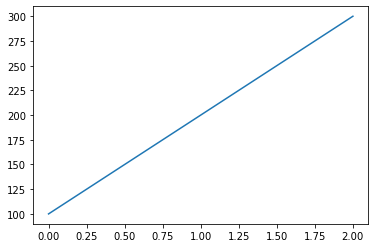

In [ ]:
plt.plot(x,y)

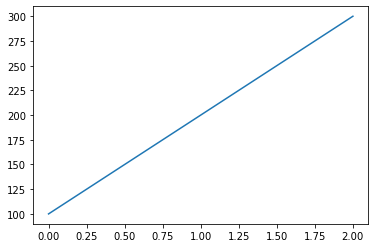

In [ ]:
# add semicolon to hide matplotlib text output
plt.plot(x,y);

In [ ]:
# When running a .py file , you need to add plt.show() at the end of your commands

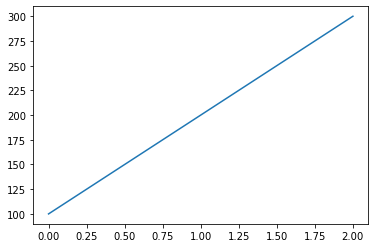

In [ ]:
# For running .py files!
plt.plot(x,y)
plt.show()

## Basic Tools

We will only use pure matplotlib for really quick,basic plots.

In [ ]:
housing = pd.DataFrame({'rooms':[1,1,2,2,2,3,3,3],
                       'price':[100,120,190,200,230,310,330,305]})

In [ ]:
housing

,rooms,price
0,1,100
1,1,120
2,2,190
3,2,200
4,2,230
5,3,310
6,3,330
7,3,305


In [ ]:
# Probably not a great plot, since this implies a continuous relationship!
# plt.plot(housing['rooms'],housing['price'])

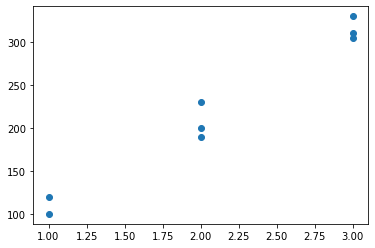

In [ ]:
plt.scatter(housing['rooms'],housing['price'])

## Style Calls

One of the main reasons to learn the absolute basics is to see how the style interactions effect the API.

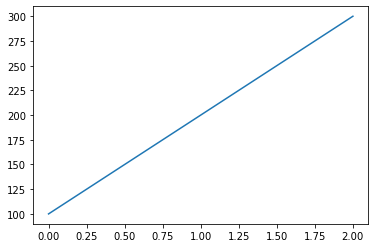

In [ ]:
plt.plot(x,y)

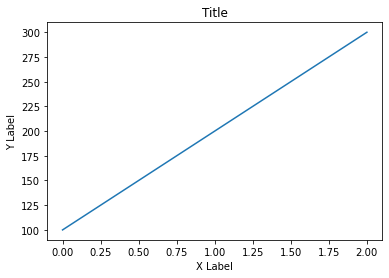

In [ ]:
plt.plot(x,y)
plt.title('Title')
plt.xlabel('X Label')
plt.ylabel('Y Label');

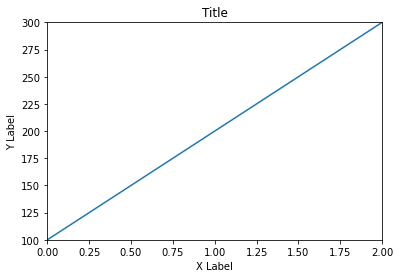

In [ ]:
plt.plot(x,y)

# Axis and ticks
plt.xlim(0,2)
plt.ylim(100,300)


# Labeling
plt.title('Title')
plt.xlabel('X Label')
plt.ylabel('Y Label');

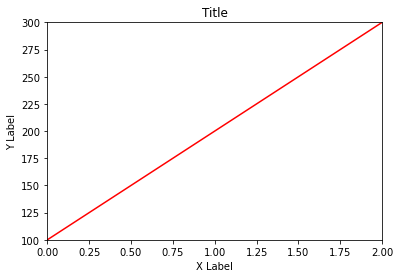

In [ ]:
plt.plot(x,y,color='red')

# Axis and ticks
plt.xlim(0,2)
plt.ylim(100,300)


# Labeling
plt.title('Title')
plt.xlabel('X Label')
plt.ylabel('Y Label');

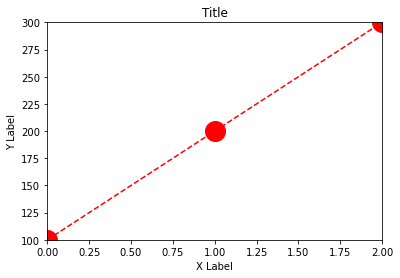

In [ ]:
plt.plot(x,y,color='red',marker='o',markersize=20,linestyle='--')

# Axis and ticks
plt.xlim(0,2)
plt.ylim(100,300)


# Labeling
plt.title('Title')
plt.xlabel('X Label')
plt.ylabel('Y Label');

That is all we will cover for matplotlib, the rest will be more intuitive with our use of pandas and seaborn!

# Seaborn Basics

Here we will focus on some very basic

## The Data

Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Columns
* age  age in years
* sex  (1 = male; 0 = female)
* cp  chest pain type
* trestbps   resting blood pressure (in mm Hg on admission to the hospital)
* cholserum   cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg   resting electrocardiographic results
* thalach   maximum heart rate achieved
* exang    exercise induced angina (1 = yes; 0 = no)
* oldpeak   ST depression induced by exercise relative to rest
* slope    the slope of the peak exercise ST segment
* ca    number of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target   1 or 0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Distribution Plots


C:\Users\Tusar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

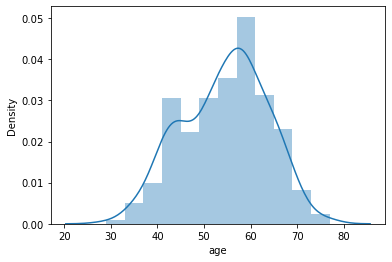

In [ ]:
sns.distplot(df['age'])

### Resizing Seaborn Plots

C:\Users\Tusar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

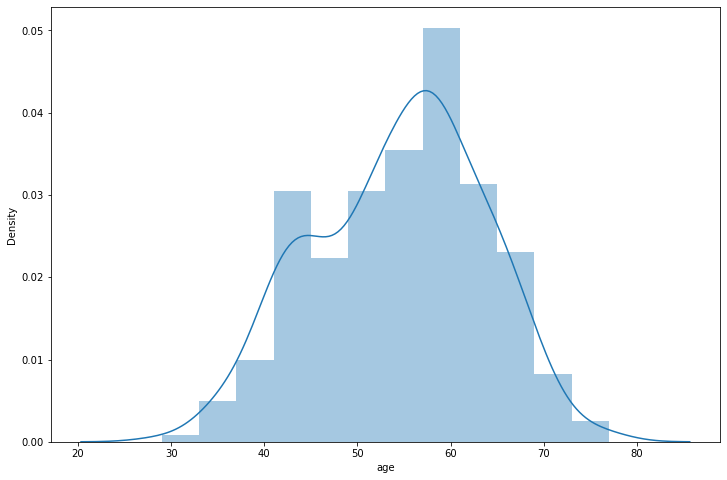

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(df['age'])

C:\Users\Tusar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

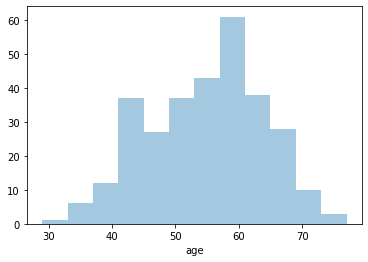

In [ ]:
sns.distplot(df['age'],kde=False)

<AxesSubplot:xlabel='age'>

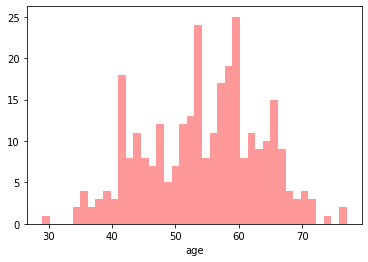

In [ ]:
sns.distplot(df['age'],kde=False,bins=40,color='red')

(50.0, 60.0)

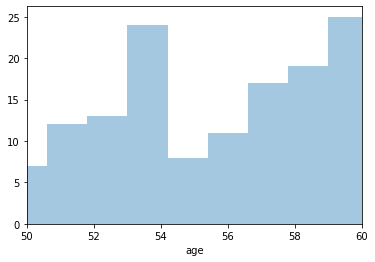

In [ ]:
sns.distplot(df['age'],kde=False,bins=40)
# Notice matplotlib calls are still connected!
plt.xlim(50,60)

# Count Plot

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [ ]:
sns.countplot(x='sex',data=df)

ValueError: ignored

In [ ]:
sns.countplot(x='target',data=df)

ValueError: ignored

In [ ]:
sns.countplot(x='cp',data=df)

In [ ]:
sns.countplot(x='cp',data=df,hue='sex')

Adding colors based on colormaps:
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [ ]:
sns.countplot(x='cp',data=df,palette='terrain')

## Box Plot

Box plots show the distributions across different categories.

<img src='../DATA/boxplot.png' style="max-width:50%;"></img>


In [ ]:
df.head()

In [ ]:
sns.boxplot(x='sex',y='age',data=df)

In [ ]:
sns.boxplot(x='target',y='thalach',data=df)

In [ ]:
sns.boxplot(x='target',y='thalach',data=df,hue='sex')

ValueError: ignored

## Scatter  Plots

Scatter plots display the relationship between two continuous features.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:
df.head()

In [ ]:
sns.scatterplot(x='chol',y='trestbps',data=df)

In [ ]:
sns.scatterplot(x='chol',y='trestbps',data=df,hue='sex')

In [ ]:
sns.scatterplot(x='chol',y='trestbps',data=df,hue='sex',palette='Dark2')

In [ ]:
sns.scatterplot(x='chol',y='trestbps',data=df,hue='sex',size='age')

## Pairplots

Pairplots perform scatterplots and histograms for every single column in your data set. This means it could be a huge plot for large datasets! Use with caution, as it could take a long time for large datasets and the figures could be too small!

INFO: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris.head()

In [ ]:
sns.pairplot(iris)

In [ ]:
# Shows KDEs instead of histograms along the diagonal
sns.pairplot(iris, hue="species")

# Pandas Assignment


The african_econ_crises.csv dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

Content
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.



* caseA     number which denotes a specific country
* cc3A     three letter country code
* country    The name of the country
* year   The year of the observation
* systemic_crisis"0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.
* exch_usd    The exchange rate of the country vis-a-vis the USD
* domestic_debt_in_default   "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year
* sovereign_external_debt_default  "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year
* gdp_weighted_default    The total debt in default vis-a-vis the GDP
* inflation_annual_cpi    The annual CPI Inflation rate
* independence   "0" means "no independence" and "1" means "independence"
* currency_crises  "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year
* inflation_crises  "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year
* banking_crisis"no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year

## Q1. Solve the folling questions by using pandas library (african_econ_crises.csv files).

**a. How many countries are represented in this data set?**

In [ ]:

import numpy as np
import pandas as pd
df = pd.read_csv('african_econ_crises.csv')
countries = pd.unique(df['country'])
len(countries)

13

**b. What are the countries represented in this data set?**

In [ ]:

print(countries)


['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'
 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa' 'Tunisia' 'Zambia'
 'Zimbabwe']


**c. What country had this highest annual CPI Inflation rate? What was the inflation rate?**

In [ ]:

mx_cpi = df['inflation_annual_cpi'].max()
country = df[df['inflation_annual_cpi'] == mx_cpi]['country'].to_numpy()[0]
print(country)
print(mx_cpi)

Zimbabwe
21989695.22


**d. In what year did Kenya have its first System Crisis?**

In [ ]:

newDf = df[(df['country'] == 'Kenya') & (df['systemic_crisis'] == 1)].reset_index().loc[[0],['year']].to_numpy()
print(newDf[0])

[1985]


**e. How many yearly systemic crisises have occurred per country?**

In [ ]:

newdf1 = df[['country', 'systemic_crisis']].groupby('country').sum('systemic_crisis')
print(newdf1)

                          systemic_crisis
country                                  
Algeria                                 4
Angola                                  0
Central African Republic               19
Egypt                                   6
Ivory Coast                             4
Kenya                                  13
Mauritius                               0
Morocco                                 2
Nigeria                                10
South Africa                            0
Tunisia                                 5
Zambia                                  4
Zimbabwe                               15


**f. How many years did  Zimbabwe have a sovereign external debt default occur?**

In [ ]:

len(df[(df['country'] == 'Zimbabwe') & (df['sovereign_external_debt_default'] == 1)]['country'])

30

**g. In what year did Algeria have its highest exchange rate?**

In [ ]:

newdf2 = df[df['country'] == 'Algeria']
mx_exchange = newdf2['exch_usd'].max()
print(mx_exchange)
print(newdf2[newdf2['exch_usd'] == mx_exchange]['year'].to_numpy()[0])


87.9706983
2014


# Visualization Assignment

## The Data

This diamonds.csv dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

#### Content

* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

## Q2. Plot the graph of following questions using visualization libraries (diamonds.csv file)

**a. Create a scatterplot of price versus carat.**

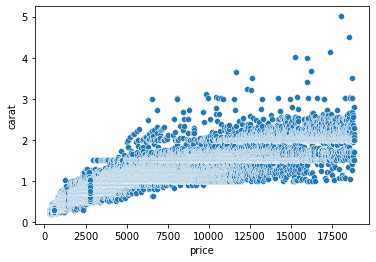

In [ ]:

import seaborn as sns
import pandas as pd
df = pd.read_csv('diamonds.csv')
sns.scatterplot(x = 'price', y = 'carat', data = df)

**b. Use alpha parameter and edgecolor parameter to deal with the overlapping issue and white edgemarker issue.**

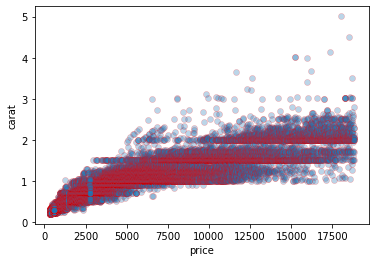

In [ ]:

sns.scatterplot(x = 'price',y = 'carat',data = df, edgecolor = 'red', alpha = 0.3)

**c. Create a histogram of the price column.**

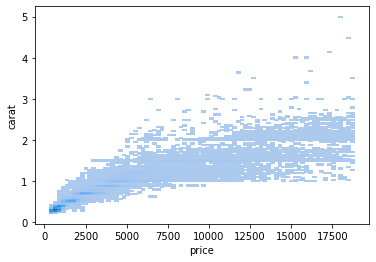

In [ ]:

sns.histplot(data = df,x = 'price',y='carat')

**d. Create a count plot of the instances per cut type.**

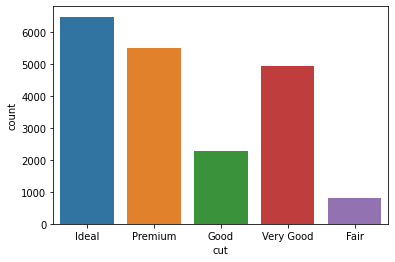

In [ ]:

sns.countplot(data = df,x = 'cut')

**e. Create a large box plot figure showing the price distribution per cut type.**

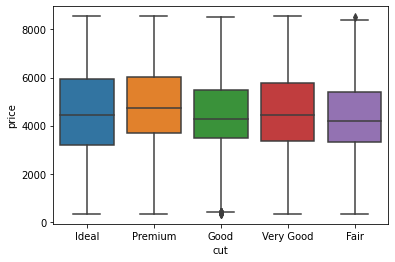

In [ ]:

sns.boxplot(data = df, x = 'cut',y = 'price')